<a href="https://colab.research.google.com/github/mazharkafi004/Machine-Learning-Assignment-SWE-428/blob/main/CNN_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data import and Preprocessing**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CNN_dataset.zip to CNN_dataset.zip


In [ ]:
import zipfile

zipped = zipfile.ZipFile('CNN_dataset.zip', 'r')
zipped.extractall("/temp")
zipped.close()
dataset_dir = '/temp/CNN_dataset'

**Importing Necessary Libraries**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

**Specifying Data for training,validation and testing; Specify the classes**

In [ ]:
train_split = 0.75
valid_split = 0.1
test_split = 0.15

images = []
labels = []

classes = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

**Resizing the data**

In [ ]:
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_dir, class_name)
    for dirpath, dirnames, filenames in os.walk(class_path):
        for img_name in filenames:
            img_path = os.path.join(dirpath, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(i)

In [ ]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

**Splitting The Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=valid_split/(train_split-valid_split),
    stratify=y_train, random_state=42)

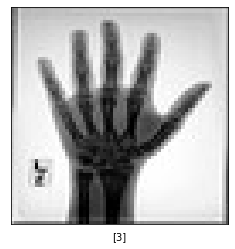

In [ ]:
import matplotlib.pyplot as plt

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[8]])
plt.imshow(x_train[8],cmap=plt.cm.binary)

In [ ]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

**Defining the model**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Resizing**

In [ ]:
x_train = x_train.reshape(-1,64, 64,1) 
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(71923, 64, 64, 1)

**Training The Model**

In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=80,
          epochs=5,
          verbose=1,
          validation_split=.3)

Epoch 1/5
840/840 [==============================] - 442s 526ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0290 - val_accuracy: 0.9918
Epoch 2/5
840/840 [==============================] - 444s 529ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 3/5
840/840 [==============================] - 446s 531ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0053 - val_accuracy: 0.9982
Epoch 4/5
840/840 [==============================] - 437s 521ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 5/5
840/840 [==============================] - 437s 520ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0065 - val_accuracy: 0.9975


**Accuracy**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9980000257492065


In [ ]:
predictions = model.predict(x_test)
predictions[0]

469/469 [==============================] - 23s 49ms/step


array([9.9957424e-01, 1.5431558e-06, 1.4839522e-04, 3.4151037e-06,
       2.7238906e-04], dtype=float32)

In [ ]:
np.argmax(predictions[10])

3

In [ ]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(15000, 64, 64)

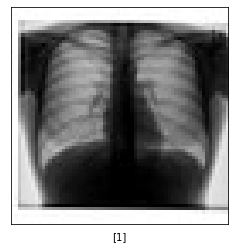

In [ ]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_test[19]])
plt.imshow(x_test[19],cmap=plt.cm.binary)

**Plotting the metrics**

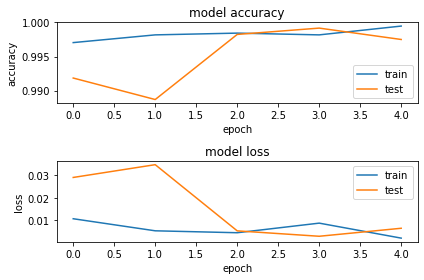

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()